In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# DataSet Load
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# 범주형 데이터를 가지는 칼럼에 대해 각 범주 별 개수 세서 시리즈  받기 (기본은 null 무시 )
titanic_df['deck'].value_counts(dropna=False)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

In [4]:
# null 여부 
titanic_df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# counting null data
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
titanic_df.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [7]:
# deleting null datas
# If over 500 nulls, delete column
titanic_df.dropna(axis = 1, thresh=500) # thresh

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [8]:
# deletes row that has null
titanic_df.dropna(subset=['age'], how='any', axis = 0) 
# any : activate when at least 1 is null
# all : activate when all the datas in column are null

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
# substituting null datas
# 1. avg
mean_age = titanic_df['age'].mean(axis = 0)
titanic_df['age'].fillna(mean_age, inplace=True)
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
# 2. 최빈값
most_freq = titanic_df['embark_town'].value_counts(dropna=True).idxmax()
titanic_df['embark_town'].fillna(most_freq, inplace=True)

titanic_df



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
# 3. 이전 값
#titanic_df[''].fiilna(method = '')

In [12]:
# delete duplicate - 중복 설문 등에 사용됨
df = pd.DataFrame({  'c1':['a', 'a', 'b', 'a', 'b'],
                     'c2':[1, 1, 1, 2, 2],
                     'c3':[1, 1, 2, 2, 2]})

In [13]:
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [14]:
# 해당 row가 앞에 등장했던 row 중 같은 row가 있는지
df_dup = df.duplicated()
df_dup

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [15]:
# 특정 column의 중복
col_dup = df['c2'].duplicated()
col_dup

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

In [16]:
# 중복 제거 
df2 = df.drop_duplicates()
df2

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [17]:
# drop duplicates by certain column
df3 = df.drop_duplicates(subset=['c2', 'c3'])
df3

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


In [18]:
df = pd.read_csv('/home/janghyunroh/Downloads/itkorea/auto-mpg.csv', header=None)
df.columns = ['연비','실린더 수','배기량','출력','차중',
              '가속능력','출시년도','제조국','모델명']
df.head()

,연비,실린더 수,배기량,출력,차중,가속능력,출시년도,제조국,모델명
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [19]:
# Unit Conversion
# Performs operation on existing columns and create new column
# 연비의 단위(mpg -> kpl)
mpg_to_kpl = 0.425
df['kpl'] = df['연비'] * mpg_to_kpl
df.head()

,연비,실린더 수,배기량,출력,차중,가속능력,출시년도,제조국,모델명,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.650
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.375
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.650
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.800
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.225


In [20]:
#
df['kpl'] = df['kpl'].round(2)
df.head()

,연비,실린더 수,배기량,출력,차중,가속능력,출시년도,제조국,모델명,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.22


In [21]:
# data type conversion
print(df.dtypes)

연비       float64
실린더 수      int64
배기량      float64
출력        object
차중       float64
가속능력     float64
출시년도       int64
제조국        int64
모델명       object
kpl      float64
dtype: object


In [22]:
# 누락 데이터 삭제
df['출력'].replace('?', np.nan, inplace=True)
df.dropna(subset='출력', axis=0, inplace=True)
df['출력'] = df['출력'].astype('float')

df['출력'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [23]:
# Data Bining
np.histogram(df['출력'], bins=3)

(array([257, 103,  32]),
 array([ 46.        , 107.33333333, 168.66666667, 230.        ]))

<Axes: ylabel='Frequency'>

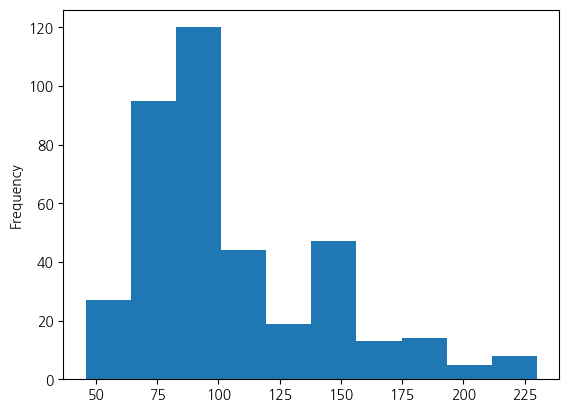

In [24]:
# 3개의 구간으로 나눈 
df['출력'].plot(kind='hist')

In [25]:
count, bin_dividers = np.histogram(df['출력'], bins=3)

bin_name = ['저출력', '보통출력', '고출력']

In [26]:
df['출력_bin'] = pd.cut(   x=df['출력'], # Data Array
                          bins = bin_dividers, #
                          labels = bin_name,  #
                          include_lowest = True)

In [27]:
df[['출력', '출력_bin']].head(15)

,출력,출력_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


In [28]:
df['출력_bin'].dtypes

CategoricalDtype(categories=['저출력', '보통출력', '고출력'], ordered=True, categories_dtype=object)

In [29]:
# get_dummies
# label encoder

# 1) get_dummies : change object -> numeric in CategoricalDtypes
horsepower_dummies = pd.get_dummies(df['출력_bin'])
print(horsepower_dummies.head(15))

      저출력   보통출력    고출력
0   False   True  False
1   False   True  False
2   False   True  False
3   False   True  False
4   False   True  False
5   False  False   True
6   False  False   True
7   False  False   True
8   False  False   True
9   False  False   True
10  False  False   True
11  False   True  False
12  False   True  False
13  False  False   True
14   True  False  False


In [30]:
# 이런 식으로 각 범주에 속하는 여부 출략
df_dummies = pd.get_dummies(df['출력_bin'], prefix='출력', dtype=int) # dtype = int 써서 
df_dummies

,출력_저출력,출력_보통출력,출력_고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393,1,0,0
394,1,0,0
395,1,0,0
396,1,0,0


In [31]:
# one-hot encoding에 사용!
df = pd.concat([df, df_dummies], axis = 1)
df

,연비,실린더 수,배기량,출력,차중,가속능력,출시년도,제조국,모델명,kpl,출력_bin,출력_저출력,출력_보통출력,출력_고출력
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65,보통출력,0,1,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38,보통출력,0,1,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65,보통출력,0,1,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80,보통출력,0,1,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.22,보통출력,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,11.48,저출력,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,18.70,저출력,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,13.60,저출력,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,11.90,저출력,1,0,0


In [32]:
# label encoding
from sklearn import preprocessing

#
label_encoder = preprocessing.LabelEncoder()

In [35]:
df['출력_라벨인코더'] = label_encoder.fit_transform(df['출력_bin'])
df[['출력_bin', '출력_라벨인코더']].head(15)

,출력_bin,출력_라벨인코더
0,보통출력,1
1,보통출력,1
2,보통출력,1
3,보통출력,1
4,보통출력,1
5,고출력,0
6,고출력,0
7,고출력,0
8,고출력,0
9,고출력,0


이렇게 범주형 데이터에 대해 라벨에 따른 정수 고유값을 부여!

한 칼럼 안에서 구분할 수 있도록 함!

자연어 처리에서 주로 쓰임!

In [38]:
# mapping을 사용하여 원하는 숫자로 변환
df['출력_라벨인코더'] = label_encoder.fit_transform(df['출력_bin'])

mapping = {label_encoder.transform(['저출력'])[0]: 0,
           label_encoder.transform(['보통출력'])[0]: 1,
           label_encoder.transform(['고출력'])[0]: 2
          }# 저출력을 0, 보통출력 -> 1, 고 -> 2로 하고 싶은 경우

df['출력_라벨인코딩_매핑'] = df['출력_라벨인코더'].map(mapping)

In [39]:
df

,연비,실린더 수,배기량,출력,차중,가속능력,출시년도,제조국,모델명,kpl,출력_bin,출력_저출력,출력_보통출력,출력_고출력,출략_라벨인코더,출력_라벨인코더,출력_라벨인코딩_매핑
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65,보통출력,0,1,0,1,1,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38,보통출력,0,1,0,1,1,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65,보통출력,0,1,0,1,1,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80,보통출력,0,1,0,1,1,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.22,보통출력,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,11.48,저출력,1,0,0,2,2,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,18.70,저출력,1,0,0,2,2,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,13.60,저출력,1,0,0,2,2,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,11.90,저출력,1,0,0,2,2,0


In [40]:
# 최대 정규화 maximum normalization
# 최댓값을 기준으로 얼마나 떨어져 있는지로 정규화(max scaler)

# bubble chart에서 했음!
df['출력'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: 출력, dtype: float64

In [42]:
df['출력'] = df['출력'] / abs( df['출력'].max() )
df.head()

,연비,실린더 수,배기량,출력,차중,가속능력,출시년도,제조국,모델명,kpl,출력_bin,출력_저출력,출력_보통출력,출력_고출력,출략_라벨인코더,출력_라벨인코더,출력_라벨인코딩_매핑,출략
0,18.0,8,307.0,0.565217,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65,보통출력,0,1,0,1,1,1,0.565217
1,15.0,8,350.0,0.717391,3693.0,11.5,70,1,buick skylark 320,6.38,보통출력,0,1,0,1,1,1,0.717391
2,18.0,8,318.0,0.652174,3436.0,11.0,70,1,plymouth satellite,7.65,보통출력,0,1,0,1,1,1,0.652174
3,16.0,8,304.0,0.652174,3433.0,12.0,70,1,amc rebel sst,6.80,보통출력,0,1,0,1,1,1,0.652174
4,17.0,8,302.0,0.608696,3449.0,10.5,70,1,ford torino,7.22,보통출력,0,1,0,1,1,1,0.608696


In [43]:
df['출력'].describe()

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: 출력, dtype: float64

In [45]:
# min/max scaler -min -> 0, max -> 1
min_x = df['차중'] - df['차중'].min()
min_max = df['차중'].max() - df['차중'].min()
df['차중'] = min_x / min_max

In [47]:
df['차중'].describe()

count    392.000000
mean       0.386897
std        0.240829
min        0.000000
25%        0.173589
50%        0.337539
75%        0.567550
max        1.000000
Name: 차중, dtype: float64